In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [24]:
# loading the loan dataset
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Cleaning and filtering data

In [25]:
loan.shape

(39717, 111)

In [26]:
# As seen in the dataset, there are many columns which only have N/A values, dropping those to proceed with analysis

loan = loan.dropna(axis=1, how="all")
loan.shape

(39717, 57)

In [27]:
# Getting some derived metrics to perform analysis
# Creating a numerical column for the loan_status, as it helps in the plots which work upon numerical values only
loan['loan_status_num'] = loan['loan_status'].apply(lambda s : 1 if ((s == 'Fully Paid') | (s == 'Current')) else 0)
loan.head()
# Charged-Off loans will be the number 0 and Fully-paid and Current will be 1.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1


In [28]:
# As observed the column for employment length has few N/A values
print(loan['emp_length'].isna().sum())
loan['emp_length'].describe()

1075


count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [29]:
# So we see that there are 1075 null values and the top value is '10+ years'. 
# In this case N/A values can be amputated with the most frequent value i.e 10+ years
loan['emp_length'].fillna(10, inplace = True)
loan['emp_length_num'] = loan['emp_length'].apply(lambda el : (''.join(filter(lambda x : x.isdigit(), str(el)))))
loan['emp_length_num'].describe()

count     39717
unique       10
top          10
freq       9954
Name: emp_length_num, dtype: object

In [34]:
# Converting the values to int from string
loan['emp_length_num'].describe()
loan['emp_length_num'] = loan['emp_length_num'].apply(lambda x : int(x))

In [86]:
# chargeoff_within_12_mths, delinq_amnt, tax_liens, acc_now_delinq, collections_12_mths_ex_med, out_prncp_inv, out_prncp
# has only 0 values, hence dropping it too.
loan = loan.drop(['chargeoff_within_12_mths','delinq_amnt','tax_liens','acc_now_delinq','collections_12_mths_ex_med','out_prncp_inv','out_prncp'], axis=1)
loan.shape

(39717, 52)

### Univariate Analysis

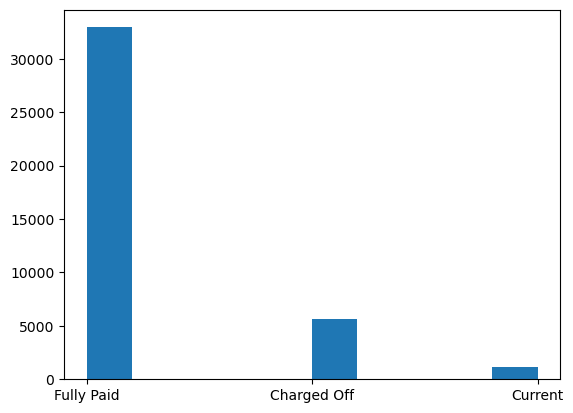

In [38]:
# First taking a look at the ratio of charged-off loans
plt.hist(loan['loan_status'])
plt.show()

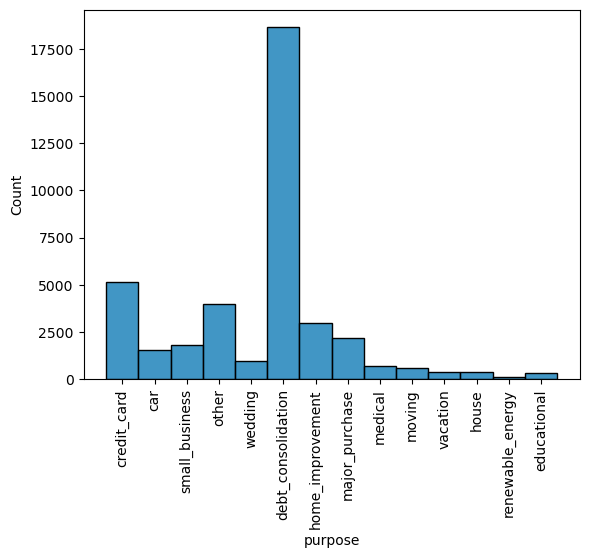

In [233]:
# Looking at the distribution of loan purpose
sns.histplot(loan['purpose'], bins = 20)
plt.xticks(rotation =90)
plt.show()

### Segmented Univariate Analysis

#### Analyzing the dataset which only has "Charged-Off" data

In [45]:
# Looking at only the dataset which has charged-off as true
loan_c = loan[loan['loan_status']=='Charged Off']
loan_c.shape

(5627, 59)

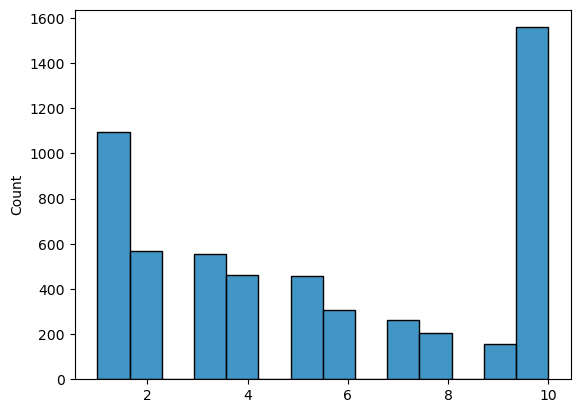

In [235]:
# Looking at the employment length of people who defaulted
sns.histplot(np.sort(loan_c['emp_length_num']))
plt.show()

#As per below histogram we see that most defaulters lie between employment length of below 2 years and 9-10 years

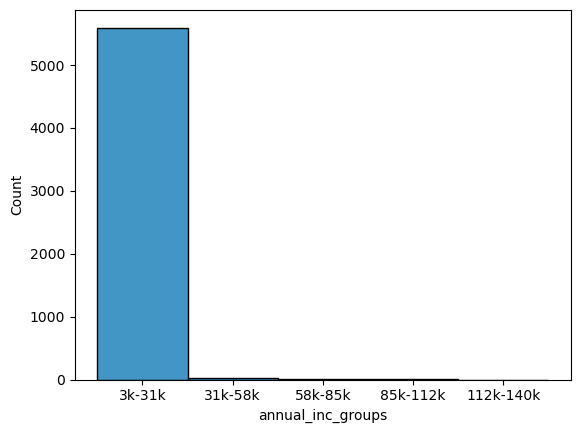

In [236]:
#Annual income distribution for individuals who charged off
loan_c['annual_inc_groups'] = pd.cut(loan_c['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
sns.histplot(loan_c['annual_inc_groups'])
plt.show()

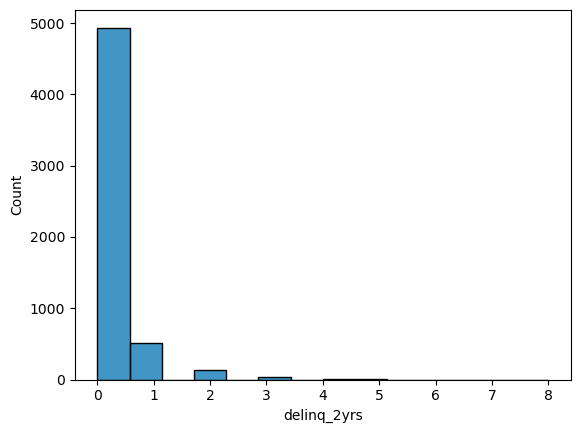

In [246]:
# trying to see how "delinquency in last 2 years" attribute affects loan defaulting
sns.histplot(loan_c['delinq_2yrs'])
plt.show()

# So there is no direct relationship, as no delinquency also has high number of charge-offs. 

In [247]:
loan_c['delinq_2yrs'].value_counts()

delinq_2yrs
0    4936
1     507
2     130
3      35
4      13
5       3
7       1
6       1
8       1
Name: count, dtype: int64

### Looking at data segment which has only Fully Paid data

In [49]:
loan_f = loan[loan['loan_status']=='Fully Paid']
loan_f.shape

(32950, 59)

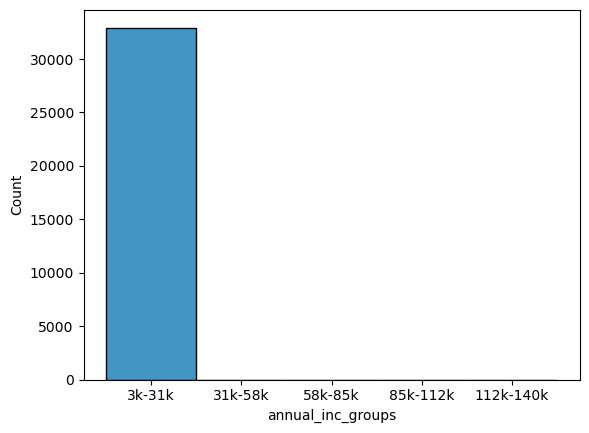

In [243]:
# Looking at Annual income distribution of loans which have been fully paid.

loan_f['annual_inc_groups'] = pd.cut(loan_f['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'], ordered=True)
sns.histplot(loan_f['annual_inc_groups'])
plt.show()
# So we dont get much insight from this segment of the data.

In [83]:
## Trying to see if "charge-off within 12 months has any impact on loan default
loan_c['chargeoff_within_12_mths'].value_counts()
# This column has only 0s

chargeoff_within_12_mths
0.0    5621
Name: count, dtype: int64

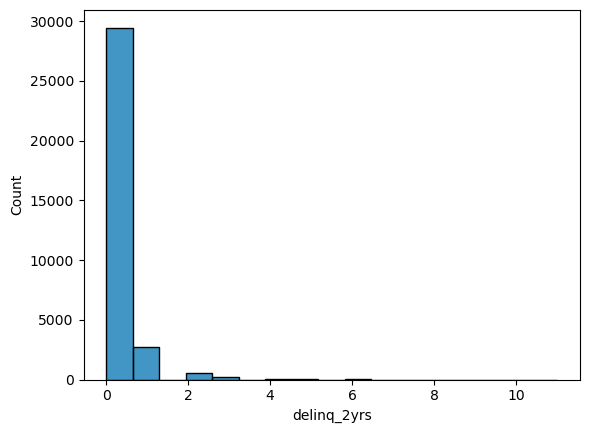

In [245]:
# trying to see if Fully Paid individuals also has delinquencies in the last 2 years.
sns.histplot(loan_f['delinq_2yrs'])
plt.show()

# People having more delinquencies in last two years have lowest no of full payments.

In [248]:
loan_f['delinq_2yrs'].value_counts()

delinq_2yrs
0     29450
1      2700
2       543
3       177
4        47
5        18
6         9
7         3
8         1
9         1
11        1
Name: count, dtype: int64

# Bivariate Analysis

In [225]:
# Purpose and interest rate
# Remove % from int_rate column and make it numeric
loan_c["int_rate_num"] = loan_c['int_rate'].apply(lambda x: float(x[:-1]))
loan["int_rate_num"] = loan['int_rate'].apply(lambda x: float(x[:-1]))

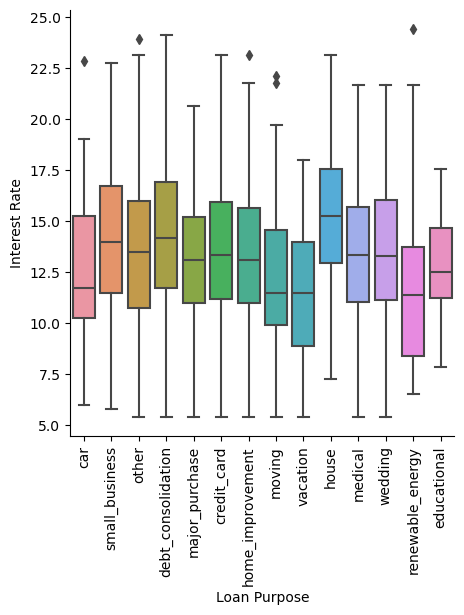

<Figure size 700x1500 with 0 Axes>

In [172]:
# trying to how Interest Rate is distributed among different Loan Purposes and which one has the highest
sns.catplot(x = "purpose", y = "int_rate_num", kind = "box", data = loan_c)
plt.xticks(rotation = 90)
plt.xlabel("Loan Purpose")
plt.ylabel("Interest Rate")
plt.figure(figsize=(7,15))
plt.show()

# So wee see that Loans for "house" have the highest interest rates.

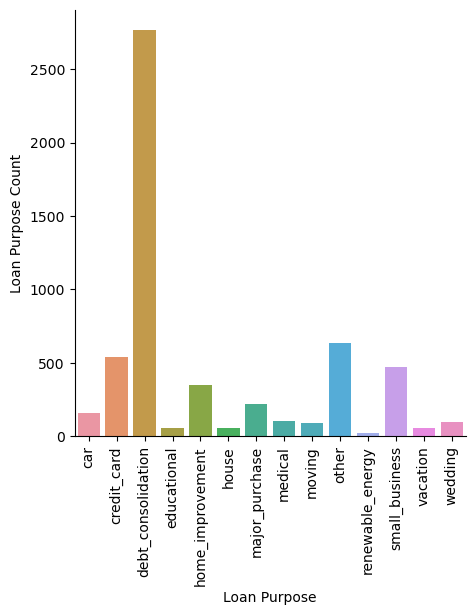

In [167]:
# Loan purpose for which there are most defaulters
loan_group_by_purpose = loan_c.groupby("purpose")['purpose'].count()

sns.catplot(x = loan_group_by_purpose.index.tolist(), y = loan_group_by_purpose.values.tolist(), kind = "bar", data = loan_c)
plt.xticks(rotation = 90)
plt.xlabel("Loan Purpose")
plt.ylabel("Loan Purpose Count")
plt.show()

# Most defaulters are for Loan purpose "Debt consolidation"

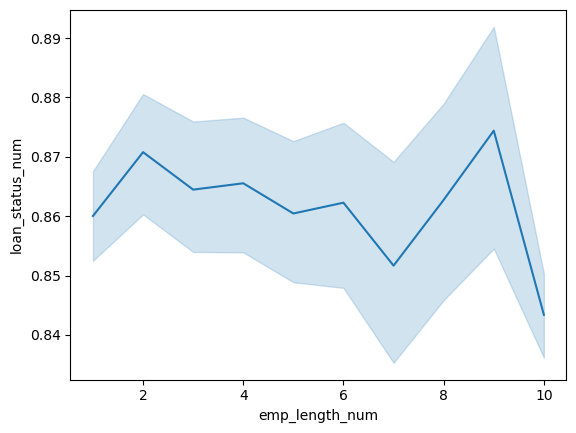

In [69]:
# Trying to see relationship between employment lenght and loan payment. Note here loan status of 1 is Fully paid, otherwise its 0.
sns.lineplot(x= loan['emp_length_num'], y = loan['loan_status_num'])
plt.show()

# Employment length of 1-2 years and 9-10 years have most Full payments

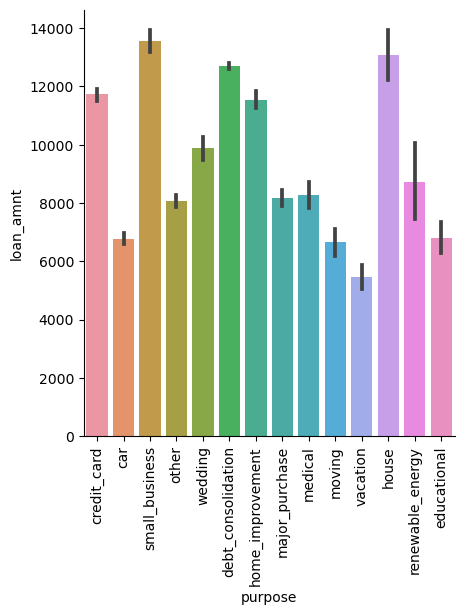

In [44]:
# Trying to find out which loan purpose has the highest loan amount
sns.catplot(x="purpose", y = "loan_amnt", kind = "bar",data=loan)
plt.xticks(rotation = 90)
plt.show()
# So we see that the highest loan amounts are for small-business and house

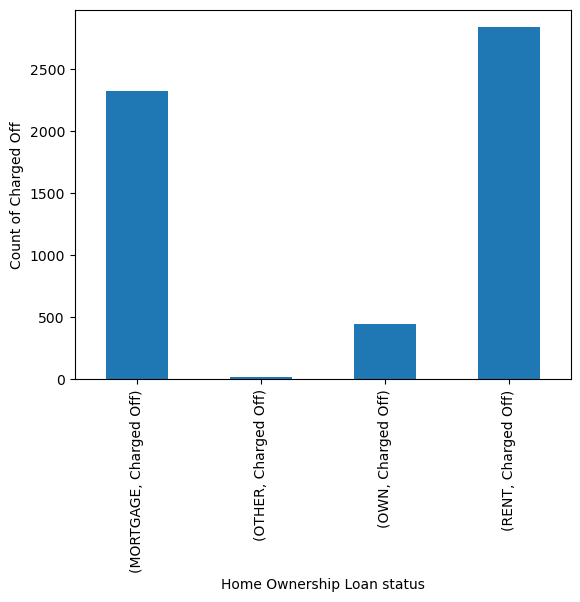

In [209]:
# We will see the relationship between house ownership and loan status
loan_group_by_home_ownership = loan_c.groupby(['home_ownership', 'loan_status'])['loan_status'].count()
loan_group_by_home_ownership.plot.bar()
plt.xlabel("Home Ownership Loan status")
plt.ylabel("Count of Charged Off")
plt.show()

# MORTGAGE and RENT home ownership have highest defaults

In [78]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [214]:
loan_c['pub_rec'].value_counts()

pub_rec
0    5160
1     457
2      10
Name: count, dtype: int64

#### See how public derogatory records affect charge-off status

pub_rec  loan_status
0        Charged Off    5160
1        Charged Off     457
2        Charged Off      10
Name: loan_status, dtype: int64


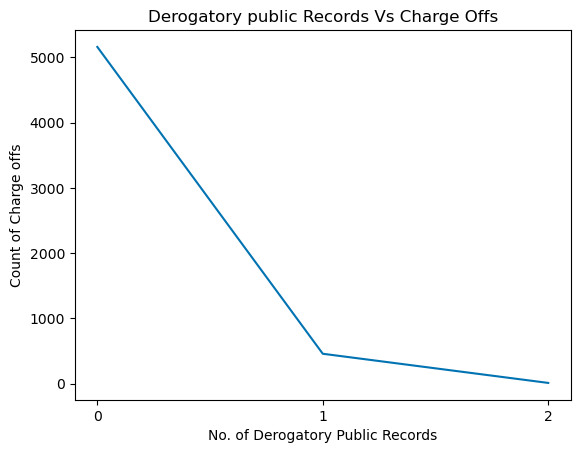

In [260]:
# Grouping by public derogatory records and loan status in the charged-off dataset
loan_group_by_pub_rec = loan_c.groupby(['pub_rec', 'loan_status'])['loan_status'].count()
print(loan_group_by_pub_rec)
loan_group_by_pub_rec.plot.line()
plt.ylabel("Count of Charge offs")
plt.xlabel("No. of Derogatory Public Records")
plt.xticks(ticks=[0,1,2], labels=['0', '1', '2'], rotation=0)
plt.title("Derogatory public Records Vs Charge Offs")
plt.show()

pub_rec  loan_status
0        Fully Paid     31347
1        Fully Paid      1556
2        Fully Paid        38
3        Fully Paid         7
4        Fully Paid         2
Name: loan_status, dtype: int64


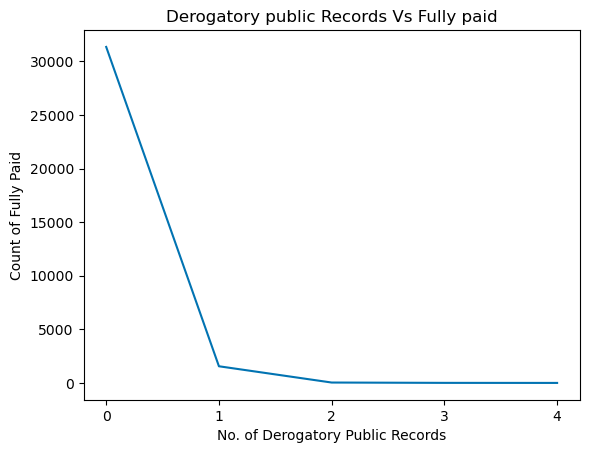

In [263]:
# Grouping by public derogatory records and loan status in the Fully Paid data set
loan_group_by_pub_rec = loan_f.groupby(['pub_rec', 'loan_status'])['loan_status'].count()
print(loan_group_by_pub_rec)
loan_group_by_pub_rec.plot.line()
plt.title("Derogatory public Records Vs Fully paid")
plt.ylabel("Count of Fully Paid")
plt.xlabel("No. of Derogatory Public Records")
plt.xticks(ticks=[0,1,2, 3, 4], labels=['0', '1', '2','3', '4'], rotation=0)
plt.show()

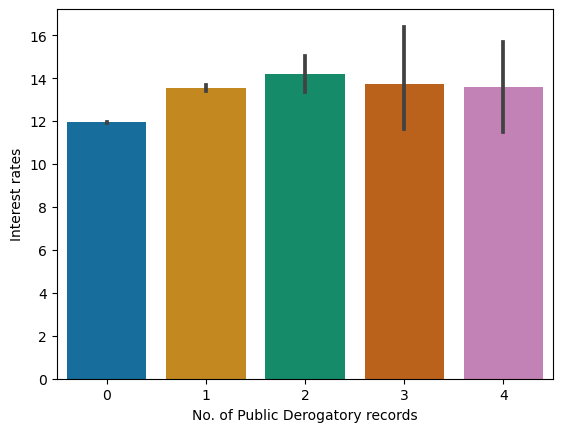

In [264]:
# Also need to see if high number of public derogatory records are affecting the interest rates
sns.barplot(x = loan['pub_rec'], y =loan['int_rate_num'], data = loan)
plt.ylabel("Interest rates")
plt.xlabel("No. of Public Derogatory records")
plt.show()

# So we see that derogatory public records of 1, 2, 3 and 4 have higher interest rates

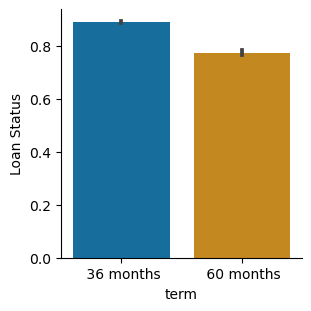

In [230]:
# looking at defaulters data set loan_c, we get the picture that 36 months term is defaulting more than 60 months term
sns.catplot(x = loan['term'], y = loan['loan_status_num'], kind = "bar", data = loan_c)
plt.ylabel("Loan Status")
plt.show()

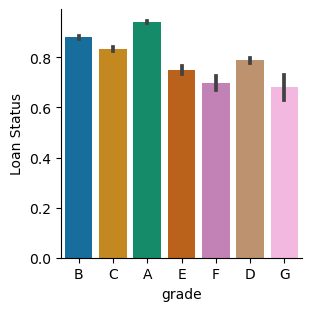

In [275]:
# Trying to see loan grades and their loan payment status
sns.catplot(x = loan["grade"], y = loan["loan_status_num"], kind = "bar", data = loan)
plt.ylabel("Loan Status")
plt.show()

# So we see that loan grade A and B are defaulting the most and loan grade F is defaulting the least.

<Axes: xlabel='grade', ylabel='count'>

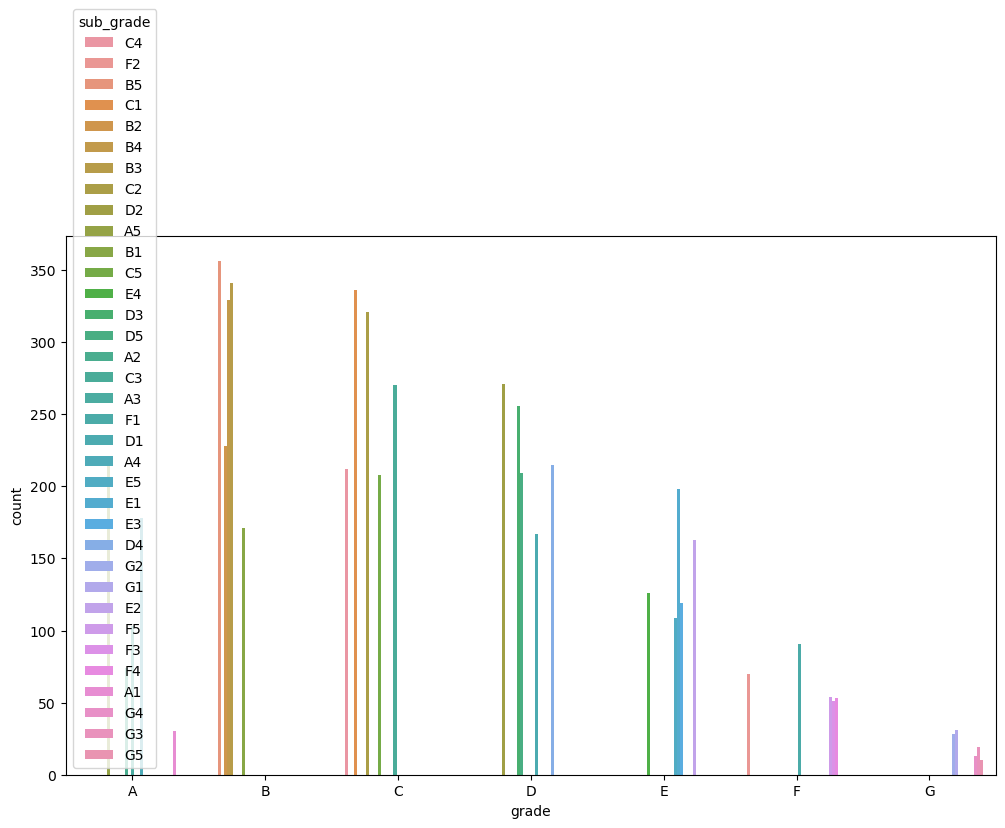

In [215]:
# trying to look more closely on the loan subgrades and their loan status
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

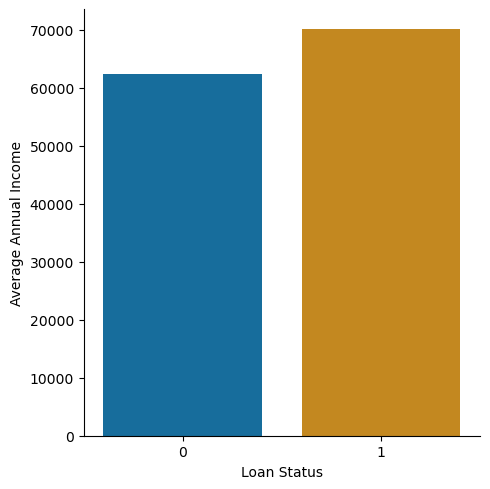

In [277]:
# Looking at average income group which are defaulters
loan_groupby_annual_income = loan.groupby("loan_status_num")['annual_inc'].mean()
sns.catplot(x= loan_groupby_annual_income.index.tolist(), y = loan_groupby_annual_income.values.tolist(), kind = "bar", data = loan)
plt.ylabel("Average Annual Income")
plt.xlabel("Loan Status")
plt.show()
# As per below observation, we see that defaulters have a low average income and non-defaulters have a higher average income

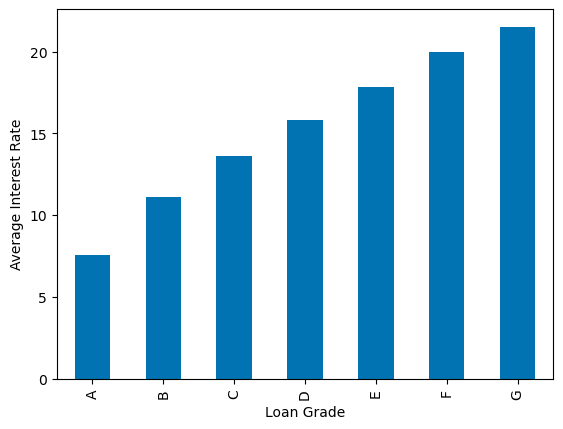

In [220]:
# Now lets look at what is the relationship of loan grades and interest rate
loan_groupby_int_rate = loan_c.groupby("grade")['int_rate_num'].mean()
loan_groupby_int_rate.plot.bar()
plt.xlabel("Loan Grade")
plt.ylabel("Average Interest Rate")
plt.show()
#Hence Loan Grade G has the highest interest rate. Lets next look at how lon grade G is associated with Charge-off status

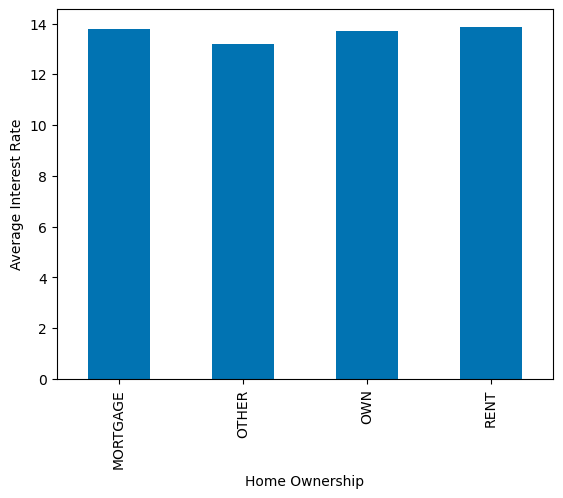

In [269]:
# trying to observe how is interest rate associated with home ownership type
loan_groupby_int_rate = loan_c.groupby("home_ownership")['int_rate_num'].mean()
loan_groupby_int_rate.plot.bar()
plt.xlabel("Home Ownership")
plt.ylabel("Average Interest Rate")
plt.show()

# We see that MORTGAGE and RENT home owners have the highest average interest rate

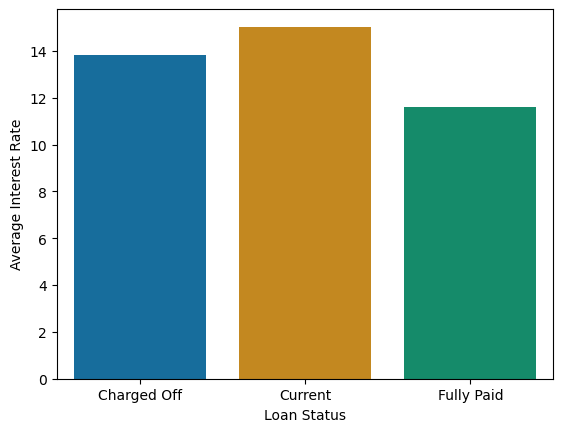

In [228]:
## See how interest rates affect loan status
loan_groupby_int_rate = loan.groupby("loan_status")['int_rate_num'].mean()
sns.barplot(x = loan_groupby_int_rate.index.tolist(), y = loan_groupby_int_rate.values.tolist())
plt.xlabel("Loan Status")
plt.ylabel("Average Interest Rate")
plt.show()

# Lower interest rates have led to less defaulting

<Axes: xlabel='annual_inc_groups', ylabel='count'>

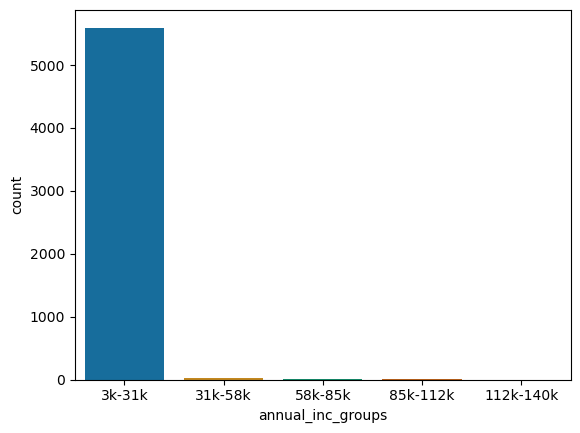

In [229]:
# See how Annual Incomes groups have their loan status
loan_c['annual_inc_groups'] = pd.cut(loan_c['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
sns.countplot(x='annual_inc_groups', data=loan_c)

# So there are most charge-offs for the income group 3-31k

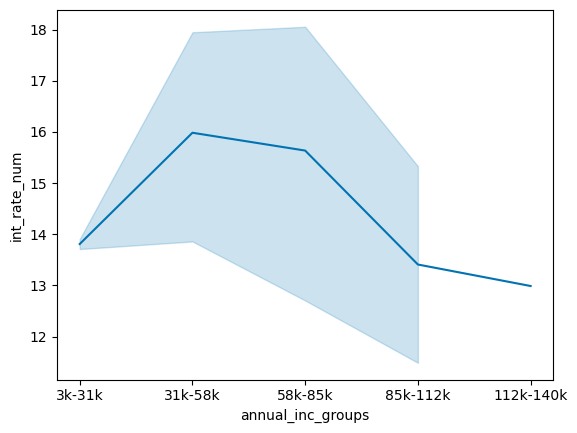

In [274]:
#See how interest rates are distribited over Annual Income groups
sns.lineplot(x = loan_c['annual_inc_groups'], y = loan_c['int_rate_num'])
plt.show()
# Highest interest rate is for 31k-58k. 

### Multivariate Analysis

In [231]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'policy_code', 'application_type', 'pub_rec_bankruptcies',
       'loan_status_num', 'emp_length_num', 'annual_inc_k', 'int_rate_num'],
      dtype='object')

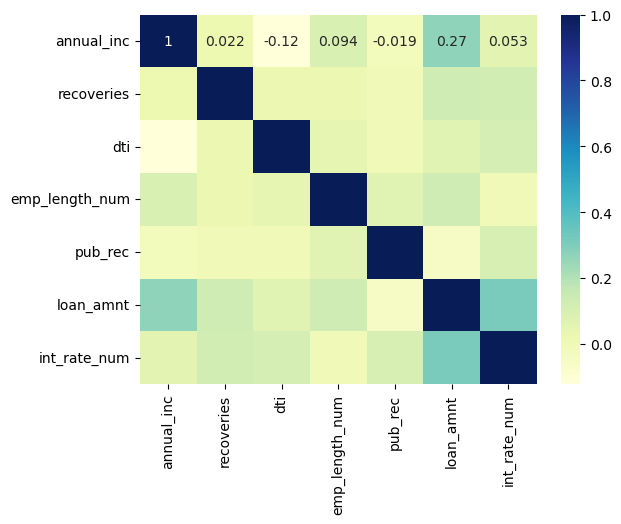

In [267]:
# In multivariate, lets look at the correlation matrix between  annual_income, dti and employment length
loan.columns
loan_mv = loan[['annual_inc','recoveries', 'dti', 'emp_length_num', 'pub_rec', 'loan_amnt', 'int_rate_num']]
datamap = sns.heatmap(loan_mv.corr(), cmap = "YlGnBu", annot=True)
plt.show()

In [268]:
print(loan_mv.corr())

                annual_inc  recoveries       dti  emp_length_num   pub_rec  \
annual_inc        1.000000    0.021589 -0.122732        0.094264 -0.018689   
recoveries        0.021589    1.000000  0.024878        0.023058 -0.005521   
dti              -0.122732    0.024878  1.000000        0.046913 -0.004621   
emp_length_num    0.094264    0.023058  0.046913        1.000000  0.068796   
pub_rec          -0.018689   -0.005521 -0.004621        0.068796  1.000000   
loan_amnt         0.271149    0.135446  0.066439        0.134996 -0.051236   
int_rate_num      0.053185    0.122259  0.111162       -0.006075  0.097208   

                loan_amnt  int_rate_num  
annual_inc       0.271149      0.053185  
recoveries       0.135446      0.122259  
dti              0.066439      0.111162  
emp_length_num   0.134996     -0.006075  
pub_rec         -0.051236      0.097208  
loan_amnt        1.000000      0.309415  
int_rate_num     0.309415      1.000000  


In [132]:
loan_mv.corr()

,total_acc,recoveries,dti,emp_length_num,pub_rec,loan_amnt
total_acc,1.000000,0.088087,0.272802,0.162958,0.016300,0.283738
recoveries,0.088087,1.000000,0.030623,0.045391,-0.053725,0.310185
dti,0.272802,0.030623,1.000000,0.057066,0.007990,0.063872
emp_length_num,0.162958,0.045391,0.057066,1.000000,0.069450,0.157888
pub_rec,0.016300,-0.053725,0.007990,0.069450,1.000000,-0.047690
loan_amnt,0.283738,0.310185,0.063872,0.157888,-0.047690,1.000000


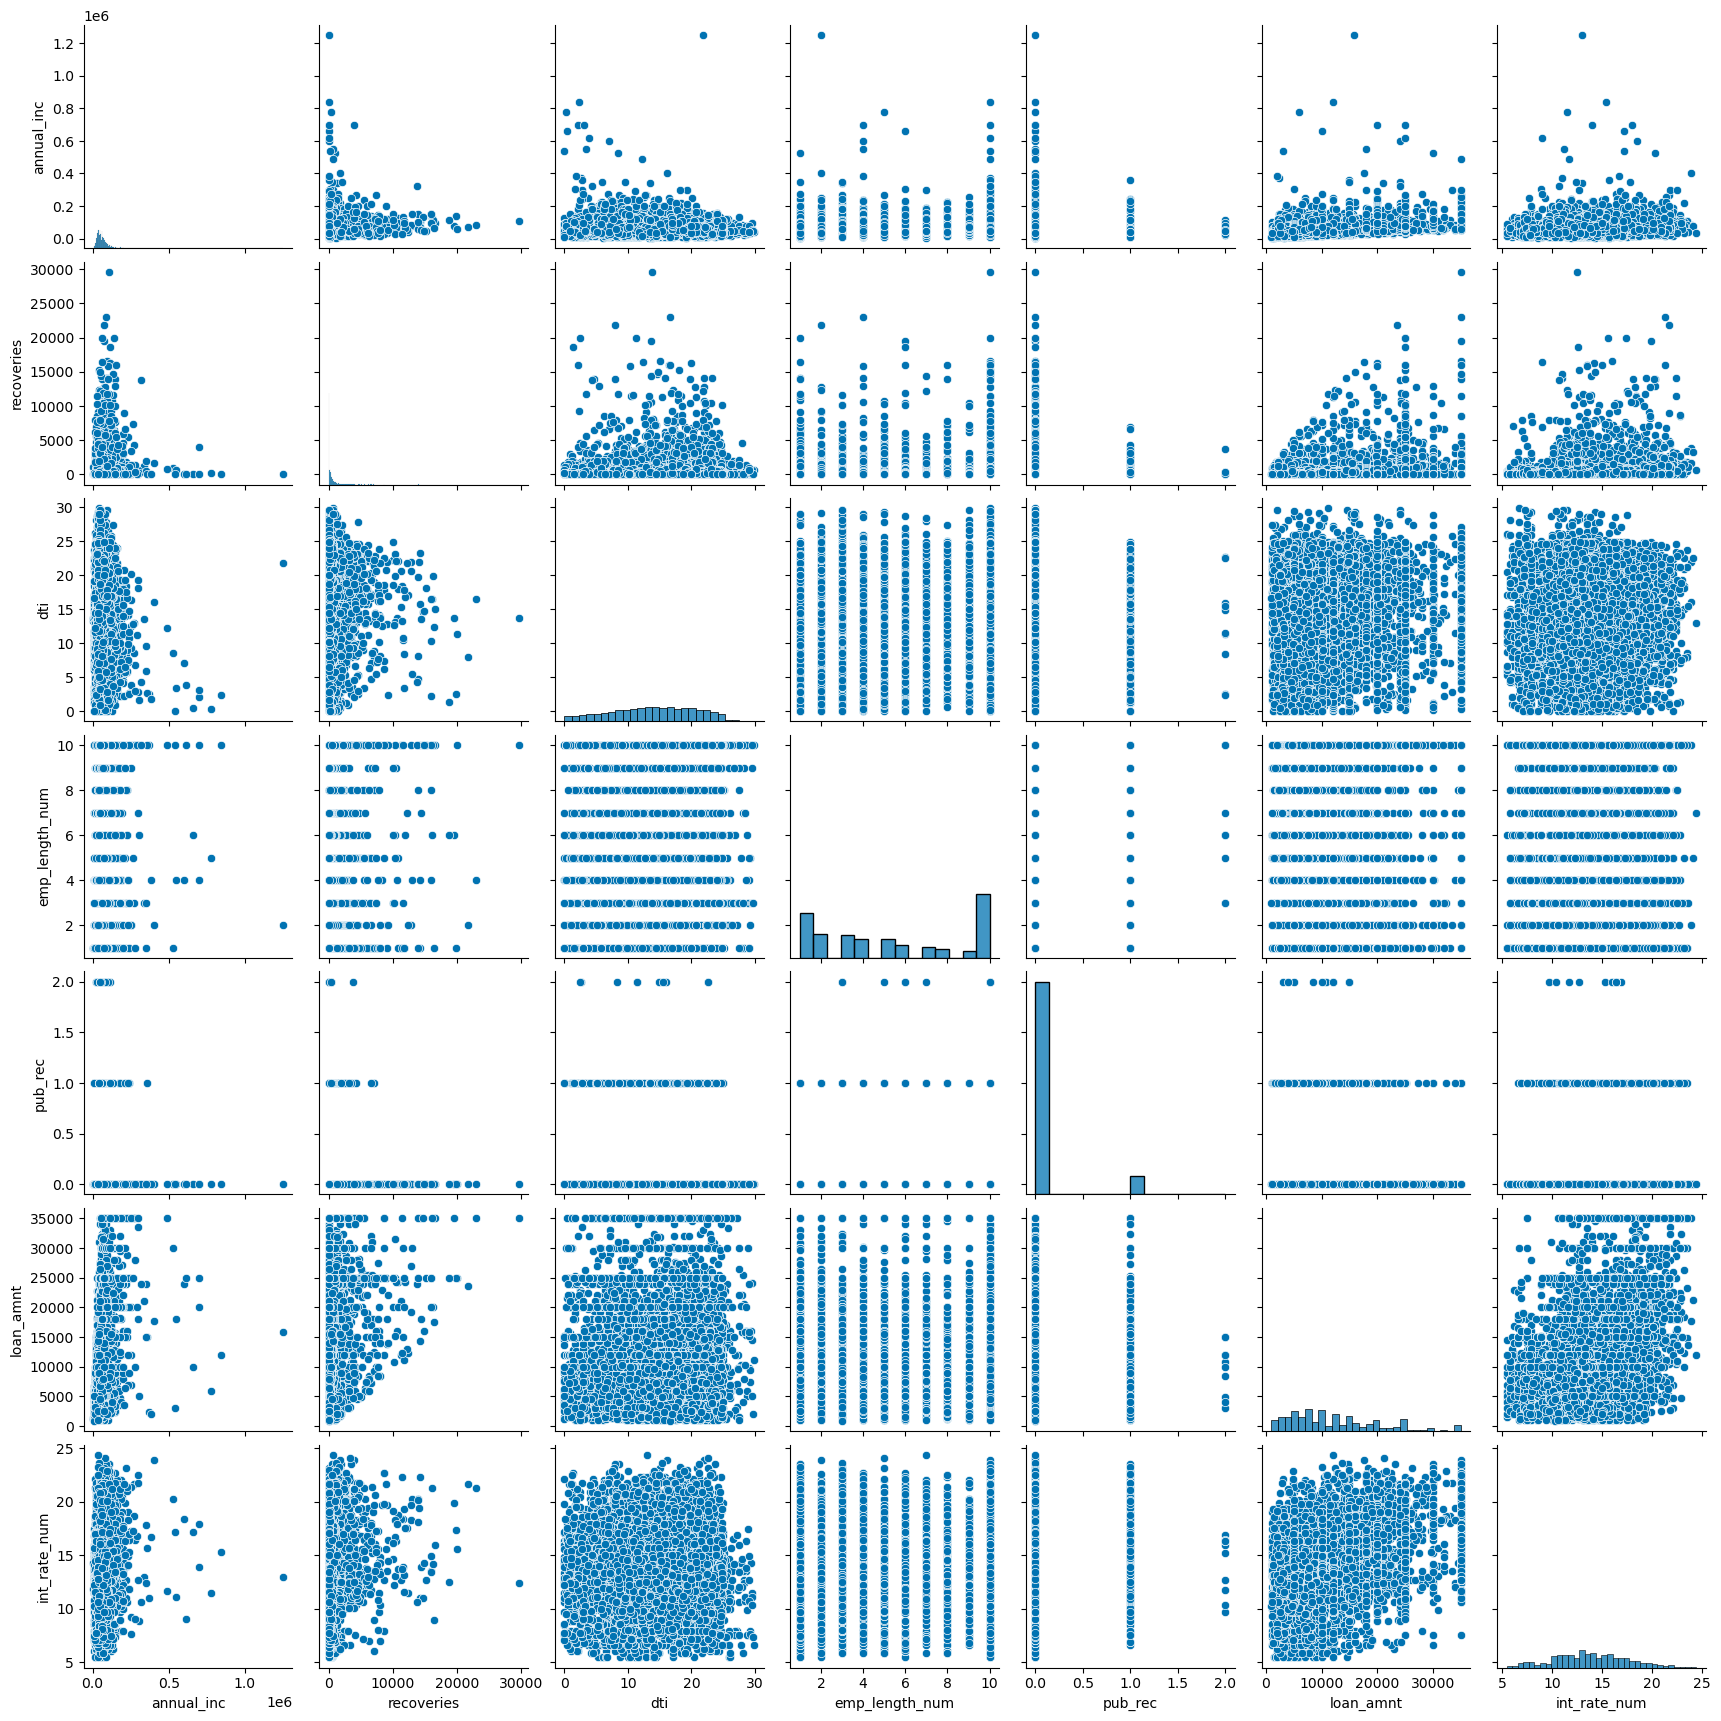

In [265]:
sns.pairplot(loan_c[['annual_inc','recoveries', 'dti', 'emp_length_num', 'pub_rec', 'loan_amnt', 'int_rate_num']])
plt.show()